# Prediction Algorithm Linear Regression

### Predict the count of activity for next day based on the count of activites for last 10 days and depending on the day of the week.

### Expects inputs in dataframe format.

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("alerts_131.csv")
print(data.head())
print(data.columns)

                                     id        resource   event  environment  \
0  044bd4f7-2548-42e2-b4e0-1bef394146fb     avmsbusqlvm  Zenoss  Development   
1  45fe18b5-d544-4fd7-827e-bdb4018fe0a4    10.57.110.87  Zenoss  Development   
2  36076770-32b3-4a40-b4b6-11a58e880833  10.236.220.117  Zenoss  Development   
3  2df48389-f908-43ac-92d6-bcdf0e98af70    10.57.110.87  Zenoss  Development   
4  fb9c92c0-a7d3-4271-810d-f7d55e9cedc0    10.57.110.87  Zenoss  Development   

  severity classification            problem_type correlate status    service  \
0    error        Generic            LowDiskSpace        {}   open  {UnKnown}   
1    error   Availability       serverUnavailable        {}   open  {UnKnown}   
2    error        Generic            LowDiskSpace        {}   open  {UnKnown}   
3    error    Performance  ApplicationPerformance        {}   open  {UnKnown}   
4    error    Performance  ApplicationPerformance        {}   open  {UnKnown}   

     ...                        

### Removing unwanted columns from dataframes


In [10]:
data=data[["resource", "classification", ""]
data["receive_time"]=str(data["receive_time"]).split(" ")[1]
print(data.head)


<bound method NDFrame.head of            resource classification receive_time
0       avmsbusqlvm        Generic             
1      10.57.110.87   Availability             
2    10.236.220.117        Generic             
3      10.57.110.87    Performance             
4      10.57.110.87    Performance             
5      10.57.110.87   Availability             
6      10.57.110.87   Availability             
7     10.236.220.18   Availability             
8       avmsbusqlvm       Capacity             
9    10.236.220.117       Capacity             
10     10.57.110.87            NaN             
11      avmsbusqlvm    Performance             
12   10.236.220.117       Capacity             
13   10.236.220.117        Generic             
14    10.236.220.18    Performance             
15      avmsbusqlvm   Availability             
16    10.236.220.18   Availability             
17    10.236.220.18   Availability             
18      avmsbusqlvm       Capacity             
19    10.2

#### working on cooked up data

In [107]:
dt=[{"resource":"avmsbusqlvm","classification":"Availability","date":"2018-06-29","count":7},
{"resource":"10.236.220.117","classification":"Generic","date":"2018-06-29","count":12},
{"resource":"10.236.220.117","classification":"Capacity","date":"2018-06-29","count":11},
{"resource":"avmsbusqlvm","classification":"Generic","date":"2018-06-29","count":7},
{"resource":"10.236.220.117","classification":"Availability","date":"2018-06-29","count":7},
{"resource":"avmsbusqlvm","classification":"Capacity","date":"2018-06-29","count":18},
{"resource":"10.236.220.18","classification":"Performance","date":"2018-06-29","count":10},
{"resource":"10.57.110.87","classification":"Performance","date":"2018-06-29","count":2},
{"resource":"10.236.220.117","classification":"Performance","date":"2018-06-29","count":4},
{"resource":"10.236.220.18","classification":"Availability","date":"2018-06-29","count":10},
{"resource":"10.57.110.87","classification":"Availability","date":"2018-06-29","count":3},
{"resource":"avmsbusqlvm","classification":"Performance","date":"2018-06-29","count":7},
{"resource":"10.236.220.18","classification":"Generic","date":"2018-06-29","count":5},
{"resource":"10.236.220.18","classification":"Capacity","date":"2018-06-29","count":12},
{"resource":"avmsbusqlvm","classification":"Availability","date":"2018-06-28","count":11},
{"resource":"10.236.220.117","classification":"Generic","date":"2018-06-28","count":10},
{"resource":"10.236.220.117","classification":"Capacity","date":"2018-06-28","count":8},
{"resource":"avmsbusqlvm","classification":"Generic","date":"2018-06-28","count":12},
{"resource":"10.236.220.117","classification":"Availability","date":"2018-06-28","count":9},
{"resource":"avmsbusqlvm","classification":"Capacity","date":"2018-06-28","count":10},
{"resource":"10.236.220.18","classification":"Performance","date":"2018-06-28","count":18},
{"resource":"10.57.110.87","classification":"Performance","date":"2018-06-28","count":5},
{"resource":"10.236.220.117","classification":"Performance","date":"2018-06-28","count":9},
{"resource":"10.236.220.18","classification":"Availability","date":"2018-06-28","count":14},
{"resource":"10.57.110.87","classification":"Availability","date":"2018-06-28","count":6},
{"resource":"avmsbusqlvm","classification":"Performance","date":"2018-06-28","count":10},
{"resource":"10.236.220.18","classification":"Generic","date":"2018-06-28","count":9},
{"resource":"10.236.220.18","classification":"Capacity","date":"2018-06-28","count":10},
{"resource":"avmsbusqlvm","classification":"Availability","date":"2018-06-27","count":13},
{"resource":"10.236.220.117","classification":"Generic","date":"2018-06-27","count":12},
{"resource":"10.236.220.117","classification":"Capacity","date":"2018-06-27","count":10},
{"resource":"avmsbusqlvm","classification":"Generic","date":"2018-06-27","count":15},
{"resource":"10.236.220.117","classification":"Availability","date":"2018-06-27","count":18},
{"resource":"avmsbusqlvm","classification":"Capacity","date":"2018-06-27","count":12},
{"resource":"10.236.220.18","classification":"Performance","date":"2018-06-27","count":10},
{"resource":"10.57.110.87","classification":"Performance","date":"2018-06-27","count":15},
{"resource":"10.236.220.117","classification":"Performance","date":"2018-06-27","count":19},
{"resource":"10.236.220.18","classification":"Availability","date":"2018-06-27","count":4},
{"resource":"10.57.110.87","classification":"Availability","date":"2018-06-27","count":16},
{"resource":"avmsbusqlvm","classification":"Performance","date":"2018-06-27","count":13},
{"resource":"10.236.220.18","classification":"Generic","date":"2018-06-27","count":6},
{"resource":"10.236.220.18","classification":"Capacity","date":"2018-06-27","count":9},
{"resource":"avmsbusqlvm","classification":"Availability","date":"2018-06-26","count":18},
{"resource":"10.236.220.117","classification":"Generic","date":"2018-06-26","count":19},
{"resource":"10.236.220.117","classification":"Capacity","date":"2018-06-26","count":18},
{"resource":"avmsbusqlvm","classification":"Generic","date":"2018-06-26","count":7},
{"resource":"10.236.220.117","classification":"Availability","date":"2018-06-26","count":6},
{"resource":"avmsbusqlvm","classification":"Capacity","date":"2018-06-26","count":15},
{"resource":"10.236.220.18","classification":"Performance","date":"2018-06-26","count":8},
{"resource":"10.57.110.87","classification":"Performance","date":"2018-06-26","count":15},
{"resource":"10.236.220.117","classification":"Performance","date":"2018-06-26","count":8},
{"resource":"10.236.220.18","classification":"Availability","date":"2018-06-26","count":4},
{"resource":"10.57.110.87","classification":"Availability","date":"2018-06-26","count":9},
{"resource":"avmsbusqlvm","classification":"Performance","date":"2018-06-26","count":15},
{"resource":"10.236.220.18","classification":"Generic","date":"2018-06-26","count":7},
{"resource":"10.236.220.18","classification":"Capacity","date":"2018-06-26","count":15},
{"resource":"avmsbusqlvm","classification":"Availability","date":"2018-06-25","count":6},
{"resource":"10.236.220.117","classification":"Generic","date":"2018-06-25","count":8},
{"resource":"10.236.220.117","classification":"Capacity","date":"2018-06-25","count":14},
{"resource":"avmsbusqlvm","classification":"Generic","date":"2018-06-25","count":9},
{"resource":"10.236.220.117","classification":"Availability","date":"2018-06-25","count":10},
{"resource":"avmsbusqlvm","classification":"Capacity","date":"2018-06-25","count":14},
{"resource":"10.236.220.18","classification":"Performance","date":"2018-06-25","count":8},
{"resource":"10.57.110.87","classification":"Performance","date":"2018-06-25","count":8},
{"resource":"10.236.220.117","classification":"Performance","date":"2018-06-25","count":7},
{"resource":"10.236.220.18","classification":"Availability","date":"2018-06-25","count":4},
{"resource":"10.57.110.87","classification":"Availability","date":"2018-06-25","count":12},
{"resource":"avmsbusqlvm","classification":"Performance","date":"2018-06-25","count":8},
{"resource":"10.236.220.18","classification":"Generic","date":"2018-06-25","count":13},
{"resource":"10.236.220.18","classification":"Capacity","date":"2018-06-25","count":15}]
print(dt)

[{'resource': 'avmsbusqlvm', 'classification': 'Availability', 'date': '2018-06-29', 'count': 7}, {'resource': '10.236.220.117', 'classification': 'Generic', 'date': '2018-06-29', 'count': 12}, {'resource': '10.236.220.117', 'classification': 'Capacity', 'date': '2018-06-29', 'count': 11}, {'resource': 'avmsbusqlvm', 'classification': 'Generic', 'date': '2018-06-29', 'count': 7}, {'resource': '10.236.220.117', 'classification': 'Availability', 'date': '2018-06-29', 'count': 7}, {'resource': 'avmsbusqlvm', 'classification': 'Capacity', 'date': '2018-06-29', 'count': 18}, {'resource': '10.236.220.18', 'classification': 'Performance', 'date': '2018-06-29', 'count': 10}, {'resource': '10.57.110.87', 'classification': 'Performance', 'date': '2018-06-29', 'count': 2}, {'resource': '10.236.220.117', 'classification': 'Performance', 'date': '2018-06-29', 'count': 4}, {'resource': '10.236.220.18', 'classification': 'Availability', 'date': '2018-06-29', 'count': 10}, {'resource': '10.57.110.87',

In [108]:
df=pd.DataFrame(dt)
print(df.head())
print(df.shape)
#df['count'] = pd.to_numeric(df.count, errors='coerce')
#print(type(df['count'][0]))

  classification  count        date        resource
0   Availability      7  2018-06-29     avmsbusqlvm
1        Generic     12  2018-06-29  10.236.220.117
2       Capacity     11  2018-06-29  10.236.220.117
3        Generic      7  2018-06-29     avmsbusqlvm
4   Availability      7  2018-06-29  10.236.220.117
(70, 4)


### training model linear regression with multiple paramethers

In [109]:
df['entity']=df.resource + ":-:"+df.classification
df['entity_code']=pd.Categorical(df['entity']).codes
df['date_code']=pd.Categorical(df['date']).codes
X=df[['entity_code','date_code']]
y=df['count']
print(df)

   classification  count        date        resource  \
0    Availability      7  2018-06-29     avmsbusqlvm   
1         Generic     12  2018-06-29  10.236.220.117   
2        Capacity     11  2018-06-29  10.236.220.117   
3         Generic      7  2018-06-29     avmsbusqlvm   
4    Availability      7  2018-06-29  10.236.220.117   
5        Capacity     18  2018-06-29     avmsbusqlvm   
6     Performance     10  2018-06-29   10.236.220.18   
7     Performance      2  2018-06-29    10.57.110.87   
8     Performance      4  2018-06-29  10.236.220.117   
9    Availability     10  2018-06-29   10.236.220.18   
10   Availability      3  2018-06-29    10.57.110.87   
11    Performance      7  2018-06-29     avmsbusqlvm   
12        Generic      5  2018-06-29   10.236.220.18   
13       Capacity     12  2018-06-29   10.236.220.18   
14   Availability     11  2018-06-28     avmsbusqlvm   
15        Generic     10  2018-06-28  10.236.220.117   
16       Capacity      8  2018-06-28  10.236.220

In [110]:
# fit final model
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
pred_value=model.predict([[10,5],[10,6],[10,7],[10,8]])
print(pred_value)

[9.09945055 8.63516484 8.17087912 7.70659341]


[9.09945055 8.63516484 8.17087912 7.70659341]


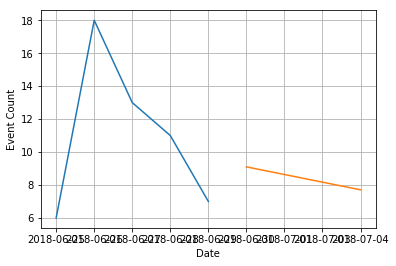

In [134]:
# plot the graph for the pattern
%matplotlib inline
import matplotlib.pyplot as plt
print(pred_value)
plt.plot(df[df['entity_code']==10]['date'],df[df['entity_code']==10]['count'],"-",['2018-06-30','2018-07-01','2018-07-03','2018-07-04'],pred_value,"-")
plt.xlabel("Date")
plt.ylabel("Event Count")
plt.grid(True)
plt.show()